In [29]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [ ]:
df_explode = df.explode('job_skills')

In [31]:
df_D1 = df[df['job_title_short'] == 'Data Analyst'].copy()
df_D2 = df[df['job_title_short'] == 'Data Scientist'].copy()
df_D3 = df[df['job_title_short'] == 'Data Engineer'].copy()

In [32]:
total1 = len(df_D1)
total2 = len(df_D2)
total3 = len(df_D3)

In [33]:
df_DA = df_explode[df_explode['job_title_short'] == 'Data Analyst'].copy()
df_DS = df_explode[df_explode['job_title_short'] == 'Data Scientist'].copy()
df_DE = df_explode[df_explode['job_title_short'] == 'Data Engineer'].copy()


In [34]:
df_DA =df_DA.groupby("job_skills").agg(
    skill_count = ("job_skills", "count"))

df_DS =df_DS.groupby("job_skills").agg(
    skill_count = ("job_skills", "count"))

df_DE =df_DE.groupby("job_skills").agg(
    skill_count = ("job_skills", "count"))


In [35]:
df_DA = df_DA.sort_values(by="skill_count", ascending=False).head(5)
df_DS = df_DS.sort_values(by="skill_count", ascending=False).head(5)
df_DE = df_DE.sort_values(by="skill_count", ascending=False).head(5)

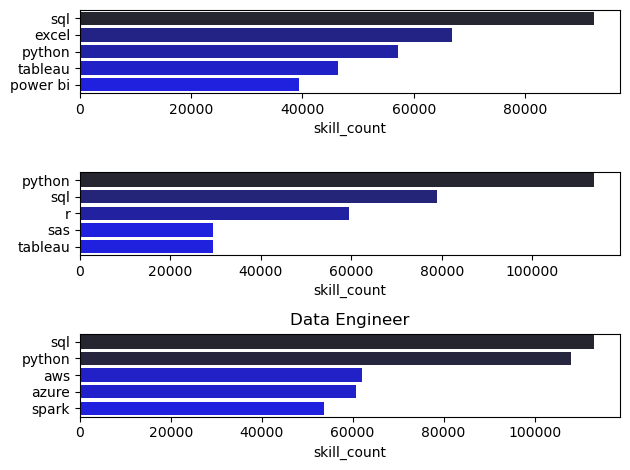

In [36]:
fig, ax = plt.subplots(3, 1)
sns.barplot(data = df_DA, x="skill_count", y=df_DA.index, ax=ax[0], hue="skill_count", palette="dark:b_r")
sns.barplot(data = df_DS, x="skill_count", y=df_DS.index, ax=ax[1], hue="skill_count", palette="dark:b_r")
sns.barplot(data = df_DE, x="skill_count", y=df_DE.index, ax=ax[2], hue="skill_count", palette="dark:b_r")

titles = ["Data Analyst", "Data Scientist", "Data Engineer"]
for i in range(3):
    ax[2].set_title(titles[i])
    ax[i].set_ylabel("")
    ax[i].legend().remove()

plt.tight_layout()
plt.show()

In [37]:
df_DA

,skill_count
job_skills,
sql,92428
excel,66860
python,57190
tableau,46455
power bi,39380


In [38]:

df_DA["skill_percent"] = df_DA["skill_count"] / total1 * 100
df_DS["skill_percent"] = df_DS["skill_count"] / total2 * 100    
df_DE["skill_percent"] = df_DE["skill_count"] / total3 * 100


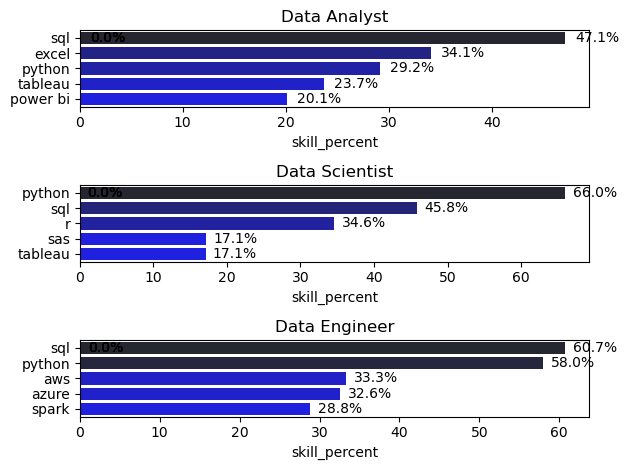

In [39]:
fig, ax = plt.subplots(3, 1)
sns.barplot(data = df_DA, x="skill_percent", y="job_skills", ax=ax[0], hue="skill_percent", palette="dark:b_r")
sns.barplot(data = df_DS, x="skill_percent", y="job_skills", ax=ax[1], hue="skill_percent", palette="dark:b_r")
sns.barplot(data = df_DE, x="skill_percent", y="job_skills", ax=ax[2], hue="skill_percent", palette="dark:b_r")

titles = ["Data Analyst", "Data Scientist", "Data Engineer"]
for i in range(3):
    ax[i].set_title(titles[i])
    ax[i].set_ylabel("")
    ax[i].legend().remove()
    for patch in ax[i].patches:
        width = patch.get_width()
        y = patch.get_y() + patch.get_height() / 2
        ax[i].text(width + 1, y, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.show()